In [ ]:
#https://medium.com/@1297rohit/transfer-learning-from-scratch-using-keras-339834b153b9
#https://thebinarynotes.com/transfer-learning-keras-vgg16/
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
#https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c



In [ ]:
# ImageDataGenerator : it is generating augmented images on the fly while your model is 
#still in the training stage. How cool is that!

In [ ]:
import keras
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense
#from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/VGG_transfer_learning')

Drive already mounted at /VGG_transfer_learning; to attempt to forcibly remount, call drive.mount("/VGG_transfer_learning", force_remount=True).


In [ ]:
#https://medium.com/@rohan1925/here-we-will-create-a-simple-cats-and-dogs-classification-model-using-keras-the-c88e15a6af9d

#base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
base_dir='/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered'
print(base_dir)

!find $base_dir -type d -print
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures


/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/validation
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/validation/cats
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/validation/dogs
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/train
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/train/cats
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/train/dogs
/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/.ipynb_checkpoints


In [ ]:
#https://medium.com/@rohan1925/here-we-will-create-a-simple-cats-and-dogs-classification-model-using-keras-the-c88e15a6af9d

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
#https://medium.com/@rohan1925/here-we-will-create-a-simple-cats-and-dogs-classification-model-using-keras-the-c88e15a6af9d

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


ImageDataGenerator

In [ ]:
#https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#https://keras.io/api/preprocessing/image/


**here are two important points that I want to draw your attention to:**


**First :** The ImageDataGenerator is not returning both the original data and the transformed data — the class only returns the randomly transformed data.

**Second :** We call this “in-place” and “on-the-fly” data augmentation because this augmentation is done at training time (i.e., we are not generating these examples ahead of time/prior to training).

In [ ]:
#https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#https://keras.io/api/preprocessing/image/

The **flow_from_directory()** method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

ImageDataGenerator will automatically label the data and map all the labels to its specific data.

In [ ]:
trdata = ImageDataGenerator()
#https://stackoverflow.com/questions/43318101/keras-image-data-generator-throwing-no-files-found-error

traindata = trdata.flow_from_directory(
    directory=train_dir,
    target_size=(224,224))


Found 2000 images belonging to 2 classes.


The **flow_from_directory()** method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

ImageDataGenerator will automatically label the data and map all the labels to its specific data.

In [ ]:
#https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#https://keras.io/api/preprocessing/image/

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(
    directory=validation_dir, 
    target_size=(224,224))


Found 1000 images belonging to 2 classes.


**top parameter is set to true**. This means that weights for our whole model will be downloaded. If this is set to false then the pre-trained weights will only be downloaded for convolution layers and no weights will be downloaded for dense layers.

In [ ]:
#Here in this part I will import VGG16 from keras with pre-trained weights which was 
#trained on imagenet. Here as you can see that include top parameter is set to true. 
#This means that weights for our whole model will be downloaded. If this is set to false 
#then the pre-trained weights will only be downloaded for convolution layers and 
#no weights will be downloaded for dense layers.

from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [ ]:
#run vggmodel.summary() then the summary of whole VGG model which was downloaded will be printed

vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

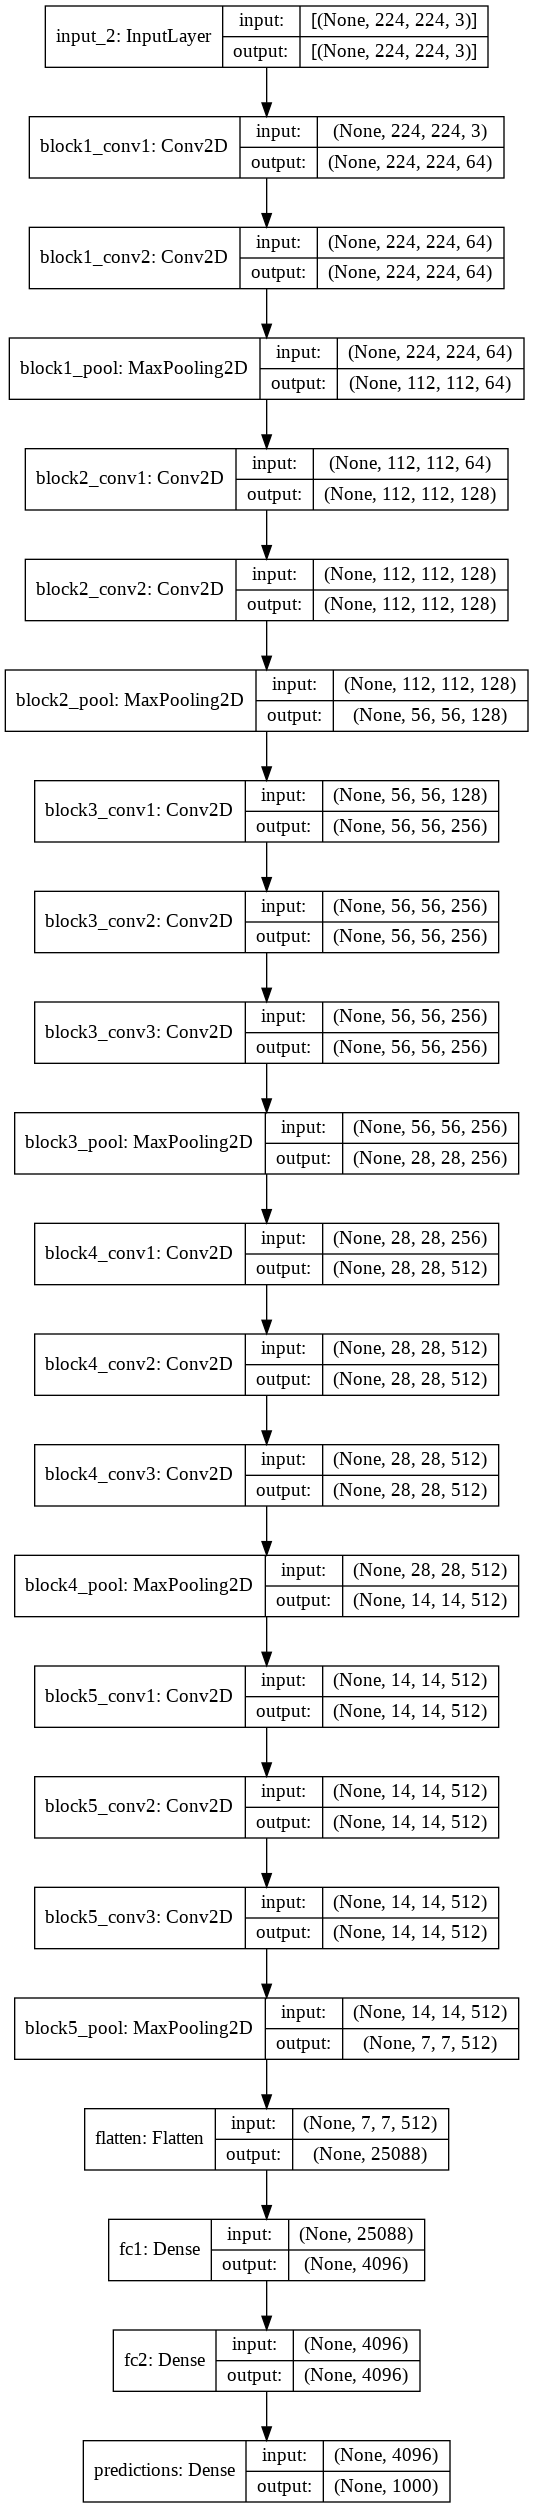

In [ ]:
## plot the model architecture using plot_model function 
plot_model(vggmodel, to_file='model.png', show_shapes=True, show_layer_names=True)

https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/

The output generated by the dense layer is an ‘m’ dimensional vector. Thus, dense layer is basically used for changing the dimensions of the vector. Dense layers also applies operations like rotation, scaling, translation on the vector.

https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

→ 1 x Dense layer of 4096 units

→ 1 x Dense layer of 4096 units

→ 1 x Dense Softmax layer of 2 units

I will use RELU activation for both the dense layer of 4096 units so that I stop forwarding negative values through the network. I use a 2 unit dense layer in the end with softmax activation as I have 2 classes to predict from in the end which are dog and cat. The softmax layer will output the value between 0 and 1 based on the confidence of the model that which class the images belongs to.


After the creation of softmax layer the model is finally prepared. Now I need to compile the model.

In [ ]:
#https://railsware.com/blog/python-for-machine-learning-indexing-and-slicing-for-lists-tuples-strings-and-other-sequential-types/   
#https://stackoverflow.com/questions/509211/understanding-slice-notation

num = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print("num[3:] : ",num[3:])
print("num[:3] : ",num[:3])
print("############################################")
print("Print the first three number : ")
for i in num[:3]:
  print(i)

num[3:] :  [40, 50, 60, 70, 80, 90]
num[:3] :  [10, 20, 30]
############################################
Print the first three number : 
10
20
30


https://medium.com/@1297rohit/transfer-learning-from-scratch-using-keras-339834b153b9

instead of training all the layers of the model we lock some of the layers and use those trained weights in the locked layers to extract particular features from our data. We don’t need to lock all the layers we can choose to retrain some of the lower layers because those lower layers will be specialised for our data.

*****************************************************
After the model has been downloaded then I need to use this model for my problem statement which is to detect cats and dogs. So here I will set that I will not be training the weights of the first 19 layers and use it as it is. Therefore i am setting the trainable parameter to False for first 19 layers.


In [ ]:
# After the model has been downloaded then I need to use this model for my problem statement 
# which is to detect cats and dogs. So here I will set that I will not be training the weights
# of the first 19 layers and use it as it is. Therefore i am setting the trainable parameter 
# to False for first 19 layers.

for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

Since my problem is to detect cats and dogs and it has two classes so the last dense layer of my model should be a 2 unit softmax dense layer. Here I am taking the second last layer of the model which is dense layer with 4096 units and adding a dense softmax layer of 2 units in the end. In this way I will remove the last layer of the VGG16 model which is made to predict 1000 classes.
*****************************************************
I also add softmax activation to each layers so that all the **negative values** are not passed to the next layer.

In [ ]:
print("vggmodel.layers[-1].output : ",vggmodel.layers[-1].output)
print("vggmodel.layers[-2].output : ",vggmodel.layers[-2].output)
print("vggmodel.layers[-3].output : ",vggmodel.layers[-3].output)

vggmodel.layers[-1].output :  KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='predictions/Softmax:0', description="created by layer 'predictions'")
vggmodel.layers[-2].output :  KerasTensor(type_spec=TensorSpec(shape=(None, 4096), dtype=tf.float32, name=None), name='fc2/Relu:0', description="created by layer 'fc2'")
vggmodel.layers[-3].output :  KerasTensor(type_spec=TensorSpec(shape=(None, 4096), dtype=tf.float32, name=None), name='fc1/Relu:0', description="created by layer 'fc1'")


In [ ]:
#https://medium.com/@1297rohit/transfer-learning-from-scratch-using-keras-339834b153b9
#https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

X= vggmodel.layers[-2].output
# 2 : jehetu amra matro 2 ta class(dog or cat) use kortesi tai...... 1000 class use korle 1000 ditam
predictions = Dense(2, activation="softmax")(X)
#model_final = Model(input = vggmodel.input, output = predictions)
#input and output er sathe s add korbo otherwise error khabo
model_final = Model(inputs = vggmodel.input, outputs = predictions) 

Now I will compile my new model. I will set the learning rate of SGD (Stochastic Gradient Descent) optimiser using lr parameter and since i have a 2 unit dense layer in the end so i will be using categorical_crossentropy as loss since the output of the model is categorical.

In [ ]:
#https://stackoverflow.com/questions/58837321/how-to-fix-attributeerror-module-tensorflow-has-no-attribute-optimizers-in

model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(learning_rate=0.0001,momentum=0.9),
                    metrics=["accuracy"])


Now if I print the summary of the model you can see that the last softmax dense layer of 1000 units has been replaced by the new softmax dense unit of 2 layers. The output is attached below

In [ ]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

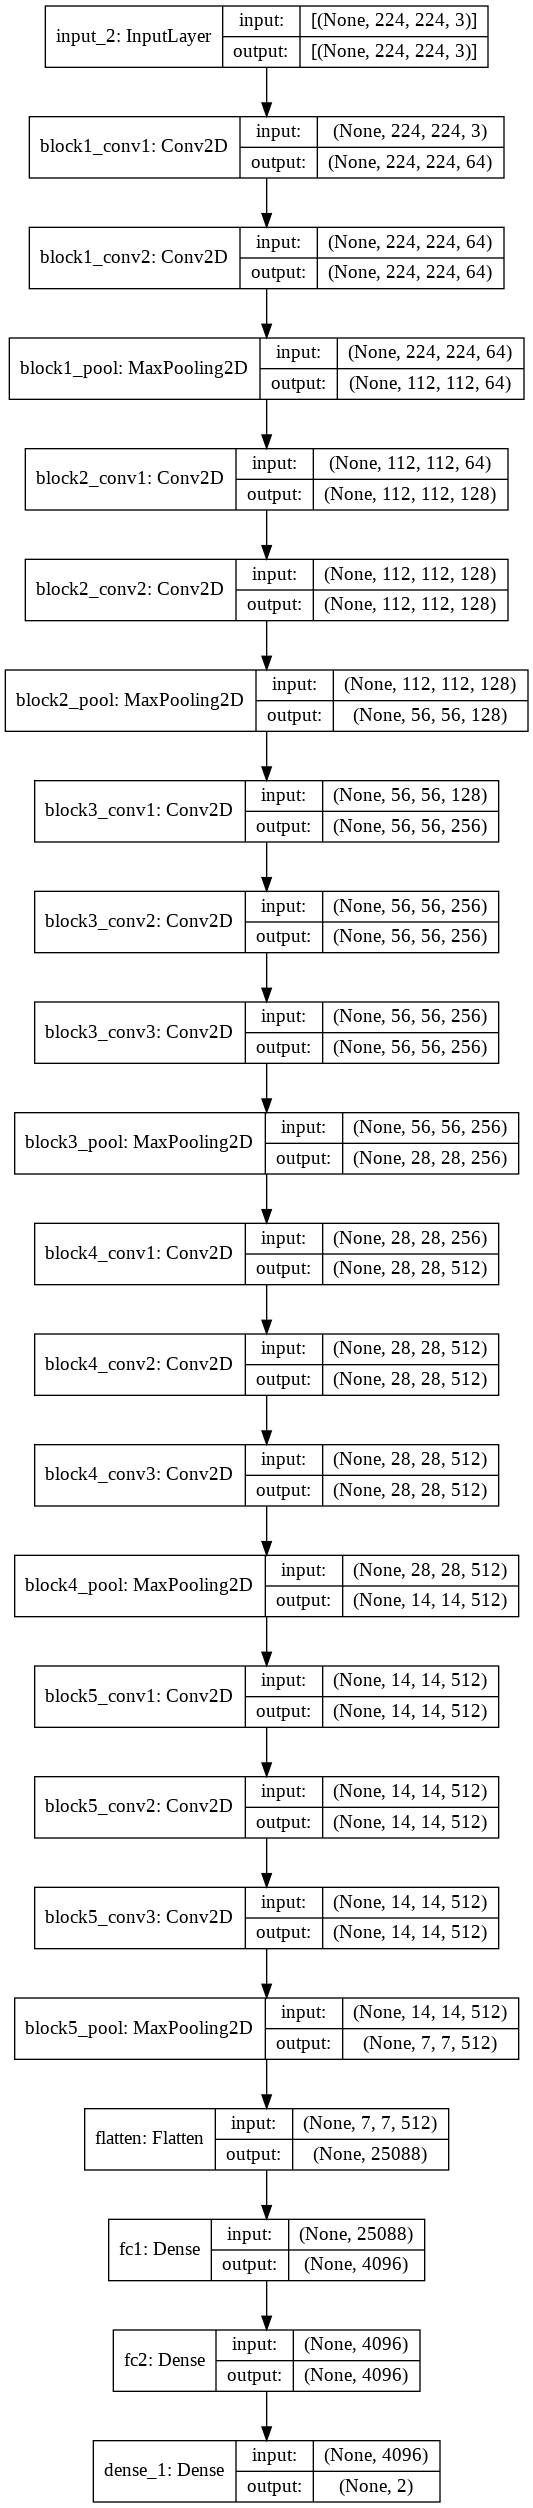

In [ ]:
plot_model(model_final, to_file='model.png', show_shapes=True, show_layer_names=True)

**Check-Point Deep Learning Models**

In [ ]:
#https://medium.com/swlh/saving-and-loading-of-keras-sequential-and-functional-models-73ce704561f4
#https://medium.com/swlh/a-high-level-overview-of-keras-modelcheckpoint-callback-deae8099d786
#https://www.pyimagesearch.com/2021/06/30/how-to-use-the-modelcheckpoint-callback-with-keras-and-tensorflow/
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
#https://thebinarynotes.com/transfer-learning-keras-vgg16/




https://colab.research.google.com/drive/16FspkI3ZP3v_Ed1A--8Tj42Fl73YsaHC#scrollTo=brWJCdhHP0EU

https://www.markiiisys.com/blog/keras-modelcheckpoint-callback-yet-another-great-one/

**filepath :** This can be any name you want.  You can literally save every model as a single file named checkpoint.h5 that will be overwritten repeatedly if you want.  If you are only saving the best model (based on a metric), this might work, but it does not give you any information about which epoch the model came from or the value of the metric at that point.  To make this information actually valuable, formatting can be used in the filepath.  In the example above, it will save the epoch number and the loss. You could use val_loss, accuracy, or val_accuracy if you chose.

**monitor :** This tells Keras which metric to monitor, such as loss, val_loss, accuracy, or val_accuracy.

**save_best_only :** Tells Keras whether or not to save all models or just the best one, again defined by your metric.  There are 2 options - True or False.  If the value is set to True and you specify it to monitor loss, it will check the loss after every epoch.  If the loss went down, then it will save that model.  If it didn't go down, it won't save it.  If you chose False, it will save the model after every epoch regardless.  That may be something you want, but each model has a tendency to be large, so watch your storage space if you are training for a large number of epochs.

**save_weights_only :** This tells Keras whether or not to save the full model or just the weights.  There are pluses and minuses to both.  If save_weights_only is set to True, only the weights are saved, not the model topology.  If set to False, it saves the weights as well as the model topology.  Again, pluses and minuses.  You have to decide which is best for you.

**save_frequency :** How often to save the model.  In my case, I am using epoch so it saves the model after every epoch, assuming the loss value decreased.

**mode :** You can set this to auto, min, or max.  Specifying min or max, tells it to evaluate the current version of the metric and and save the model depending on if the metric is less than the minimum or greater than maximum value previously produced.  So if you are using accuracy as your metric, you want mode to be max.  If loss, then min.  I'll share a secret.  You can use auto and Keras is smart enough to know that with loss, it should use min and with accuracy it should use max.  Go ahead and set it to auto just so you don't end up putting in the wrong value for mode and then have to go back and troubleshoot.

Finally, **verbose :** You know what this does.

In [ ]:
#https://colab.research.google.com/drive/16FspkI3ZP3v_Ed1A--8Tj42Fl73YsaHC#scrollTo=brWJCdhHP0EU
#https://www.markiiisys.com/blog/keras-modelcheckpoint-callback-yet-another-great-one/


vgg16_h5="/VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/VGG_Transfer_Learning_Model/vgg16_h5"
checkpoint = ModelCheckpoint(
    vgg16_h5, 
    #The model will only be saved to disk if the validation accuracy of the model 
    #in current epoch is greater than what it was in the last epoch.
    monitor='val_accuracy', 
    verbose=1, 
    # Save weights, every epoch.
    save_freq='epoch',
    #If the value is set True & you specify it to monitor loss, it will check the loss after every epoch
    #If the loss went down, then it will save that model.  If it didn't go down, it won't save it.
    save_best_only=True, 
    #If save_weights_only is set to True, only the weights are saved, not the model topology.  
    #If set to False, it saves the weights as well as the model topology.
    save_weights_only=False, 
    # I'll share a secret.  You can use auto and Keras is smart enough to know that with loss,
    # it should use min and with accuracy it should use max.
    mode='auto', 
    #period=1
    )


In [ ]:
try : 
  if not os.path.exists(vgg16_h5):
    print('vgg16_h5 is not existed')

except OSError:
  print("Error cant make directories")


vgg16_h5 is not existed


https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd

**Customizing Early Stopping**

Apart from the options monitor and patience we mentioned early, the other 2 options min_delta and mode are likely to be used quite often.

**monitor = 'val_loss' :** to use validation loss as performance measure to terminate the training.

**patience = 0 :** is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

**min_delta :** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

**mode = 'auto' :** Should be one of auto, min or max. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.

In [ ]:
#https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
#And here is an example of a customized early stopping:

early = EarlyStopping(
    #validation accuracy as performance measure to terminate the training.
    #The model will only be saved to disk if the validation accuracy of the model 
    #in current epoch is greater than what it was in the last epoch.
    monitor='val_accuracy', 
    #validation accuracy has to improve by at least 0 for it to count as an improvement
    min_delta=0, 
    # means the training is terminated as soon as 40 epochs with no improvement.
    patience=40, 
    verbose=1, 
    #the direction is automatically inferred from the name of the monitored quantity.
    mode='auto')

**monitor='val_accuracy'** to use validation accuracy as performance measure to terminate the training.

**patience=40** means the training is terminated as soon as 40 epochs with no improvement.

**min_delta=0** means the validation accuracy has to improve by at least 0.001 for it to count as an improvement. 

**mode='max'** means it will stop when the quantity monitored has stopped increasing.

**mode='auto'**'auto' mode the direction is automatically inferred from the name of the monitored quantity.

In [ ]:
if not os.path.exists(vgg16_h5) :
  hist = model_final.fit_generator(
      generator= traindata, 
      steps_per_epoch= 2, 
      epochs= 3, 
      validation_data= testdata, 
      validation_steps=1, 
      callbacks=[checkpoint,early])
else:
  print("trained model,weight,architecture are already existed")


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
2/2 [==============================] - 82s 49s/step - loss: 0.8819 - accuracy: 0.6875 - val_loss: 0.8779 - val_accuracy: 0.7500

Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to /VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/VGG_Transfer_Learning_Model/vgg16_h5
INFO:tensorflow:Assets written to: /VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/VGG_Transfer_Learning_Model/vgg16_h5/assets
Epoch 2/3
2/2 [==============================] - 76s 45s/step - loss: 0.5757 - accuracy: 0.7500 - val_loss: 0.5779 - val_accuracy: 0.8125

Epoch 00002: val_accuracy improved from 0.75000 to 0.81250, saving model to /VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/VGG_Transfer_Learning_Model/vgg16_h5
INFO:tensorflow:Assets written to: /VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/VGG_Transfer_Learning_Model/vgg16_h5/assets
Epoch 3/3
2/2 [==============================] - 79s 

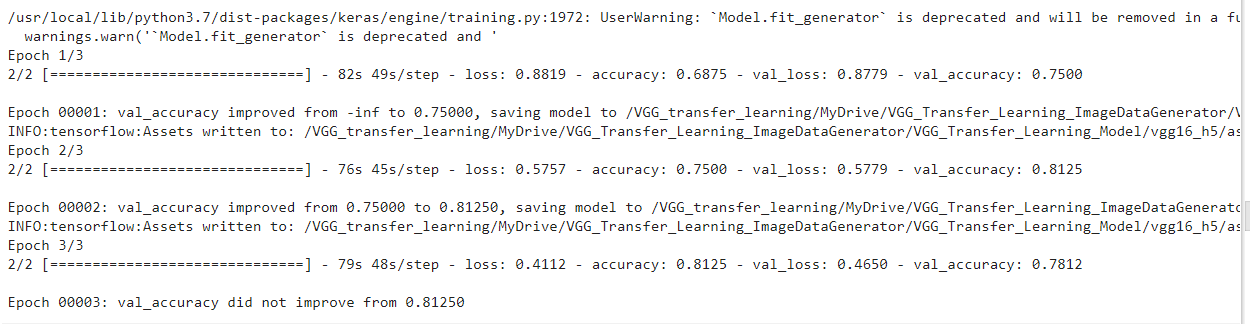

In [ ]:

if os.path.exists(vgg16_h5):
  print('vgg16_h5 is existed')


vgg16_h5 is existed


In [ ]:
#Save the model; in h5 format into the defined vgg1_h5 path
####################################################################################

############   model save issue   #################################################

####################################################################################


#model_final.save_weights(vgg16_h5)

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


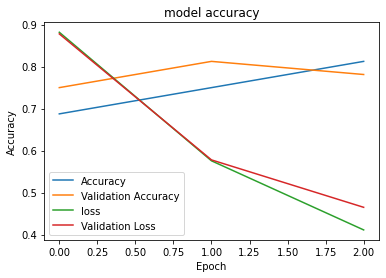

In [ ]:
#print(hist.history.keys())

import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

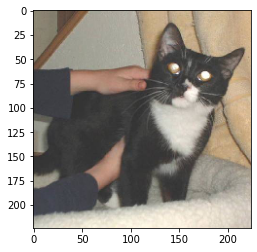

In [ ]:
from keras.preprocessing import image
path_="/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/validation/cats/cat.2000.jpg"
img = image.load_img(path_,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)


In [ ]:
print("img.shape : ",img.shape)
img = np.expand_dims(img, axis=0)
print("img.shape : ",img.shape)


img.shape :  (224, 224, 3)
img.shape :  (1, 224, 224, 3)


In [ ]:
#Load the saved model
from keras.models import load_model
saved_model = load_model(vgg16_h5)


In [ ]:
saved_model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f9136b6cb90>>

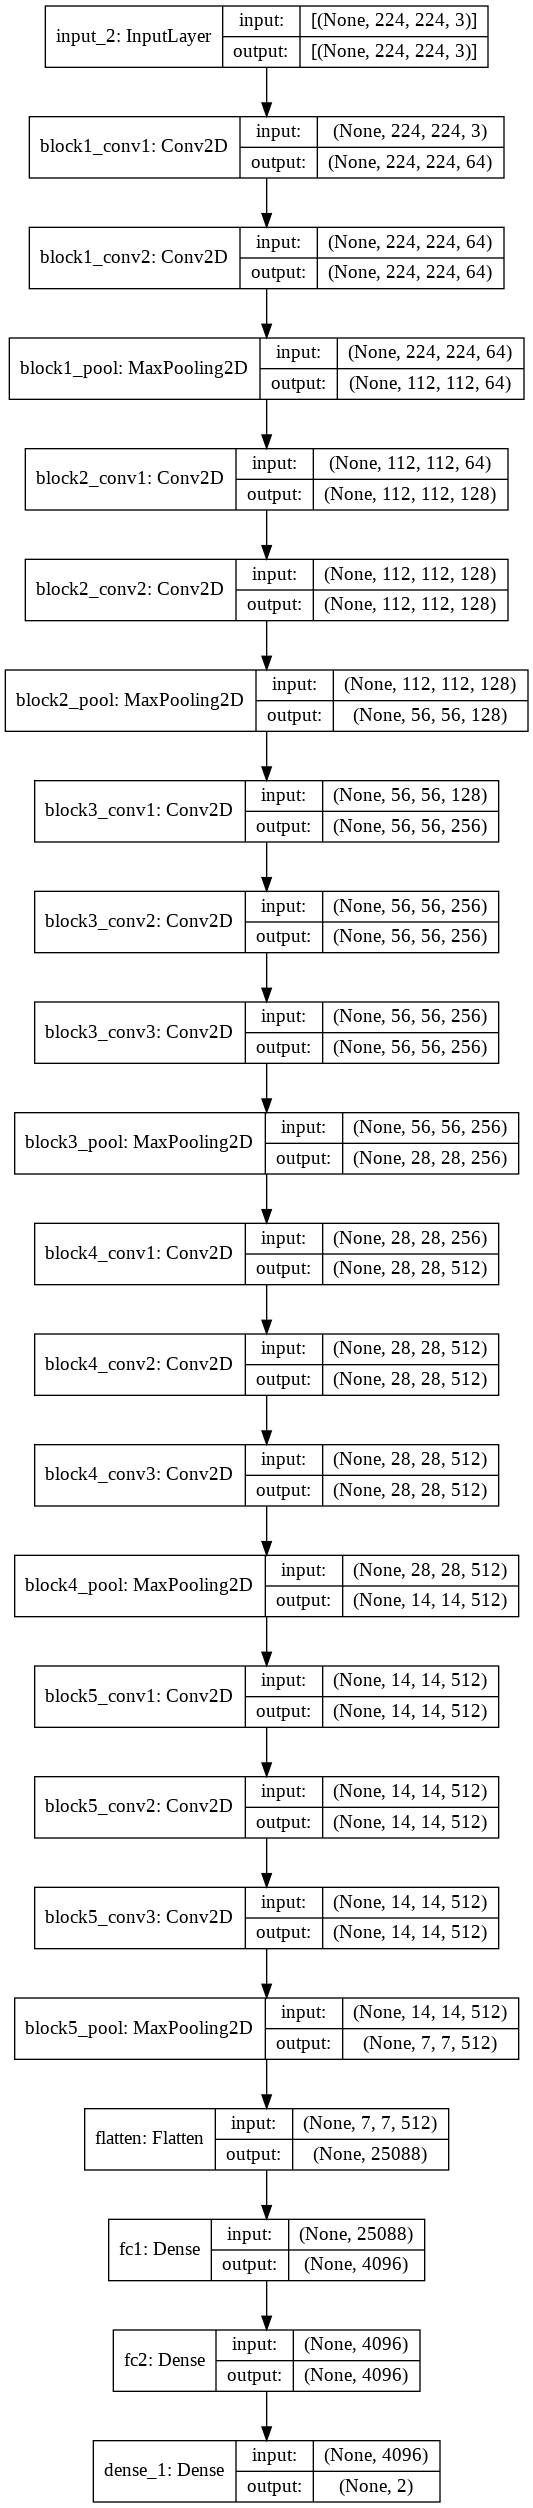

In [ ]:
#Plot the model which is loaded from vgg16_h5
plot_model(saved_model, to_file='model.png', show_shapes=True, show_layer_names=True)

###################   cat   #######################


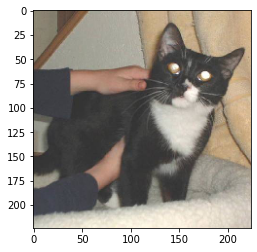

In [ ]:
#####################   Prediction Dog or Cat   #########################


path_="/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/validation/cats/cat.2000.jpg"
img = image.load_img(path_,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("###################   cat   #######################")
else:
    print('###################   dog   #######################')

###################   dog   #######################


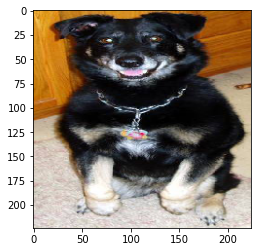

In [ ]:
#####################   Prediction Dog or Cat   #########################

path_="/VGG_transfer_learning/MyDrive/cats_and_dogs_filtered/validation/dogs/dog.2011.jpg"
img = image.load_img(path_,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("###################   cat   #######################")
else:
    print('###################   dog   #######################')

https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

**Step by step VGG16 implementation in Keras for beginners**

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [ ]:

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(
    optimizer=opt, 
    loss=keras.losses.categorical_crossentropy, 
    metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

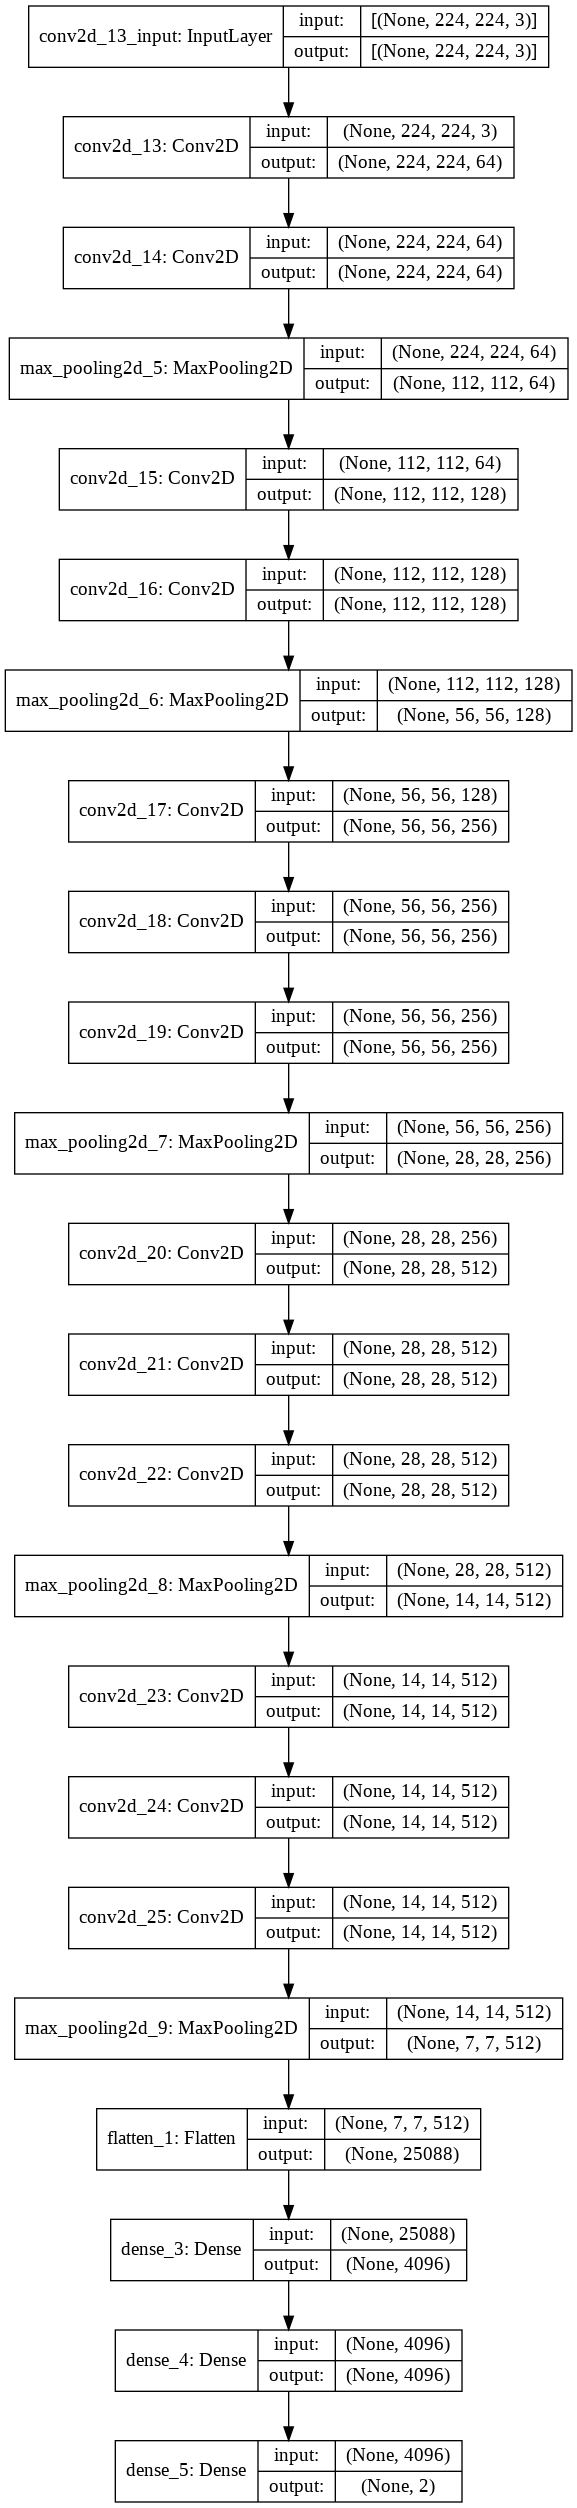

In [ ]:

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
#https://colab.research.google.com/drive/16FspkI3ZP3v_Ed1A--8Tj42Fl73YsaHC#scrollTo=brWJCdhHP0EU
#https://www.markiiisys.com/blog/keras-modelcheckpoint-callback-yet-another-great-one/


step_vgg16_h5="/VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/Step by step VGG16 for beginners/step_vgg16_h5"
checkpoint = ModelCheckpoint(
    step_vgg16_h5, 
    #The model will only be saved to disk if the validation accuracy of the model 
    #in current epoch is greater than what it was in the last epoch.
    monitor='val_accuracy', 
    verbose=1, 
    # Save weights, every epoch.
    #save_freq='epoch',
    #If the value is set True & you specify it to monitor loss, it will check the loss after every epoch
    #If the loss went down, then it will save that model.  If it didn't go down, it won't save it.
    save_best_only=True, 
    #If save_weights_only is set to True, only the weights are saved, not the model topology.  
    #If set to False, it saves the weights as well as the model topology.
    save_weights_only=False, 
    # I'll share a secret.  You can use auto and Keras is smart enough to know that with loss,
    # it should use min and with accuracy it should use max.
    mode='auto', 
    SAVE_PERIOD =10
    #period=10
    )


In [ ]:
#https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
#And here is an example of a customized early stopping:

early = EarlyStopping(
    #validation accuracy as performance measure to terminate the training.
    #The model will only be saved to disk if the validation accuracy of the model 
    #in current epoch is greater than what it was in the last epoch.
    monitor='val_accuracy', 
    #validation accuracy has to improve by at least 0 for it to count as an improvement
    min_delta=0, 
    # means the training is terminated as soon as 20 epochs with no improvement.
    patience=20, 
    verbose=1, 
    #the direction is automatically inferred from the name of the monitored quantity.
    mode='auto')


**fit(object, x = NULL, y = NULL, batch_size = NULL, epochs = 10,
  verbose = getOption("keras.fit_verbose", default = 1),
  callbacks = NULL, view_metrics = getOption("keras.view_metrics",
  default = "auto"), validation_split = 0, validation_data = NULL,
  shuffle = TRUE, class_weight = NULL, sample_weight = NULL,
  initial_epoch = 0, steps_per_epoch = NULL, validation_steps = NULL,
  ...)**

**object :** the model to train. 

**X :** our training data. Can be Vector, array or matrix 

**Y :** our training labels. Can be Vector, array or matrix 

**Batch_size :** it can take any integer value or NULL and by default, it will
be set to 32. It specifies no. of samples per gradient.  

**Epochs :** an integer and number of epochs we want to train our model for.  

**Verbose :** specifies verbosity mode(0 = silent, 1= progress bar, 2 = one
line per epoch).   

**Shuffle :** whether we want to shuffle our training data before each epoch.  

**steps_per_epoch :** it specifies the total number of steps taken before

one epoch has finished and started the next epoch. By default it values is set to NULL.

In [ ]:

# hist = model.fit_generator(
#     steps_per_epoch=10,
#     generator=traindata, 
#     validation_data= testdata, 
#     validation_steps=10,
#     epochs=13,
#     callbacks=[checkpoint,early])


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/13
10/10 [==============================] - 172s 13s/step - loss: 65829836161024.0000 - accuracy: 0.5000 - val_loss: 4879144051539968.0000 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to /VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/Step by step VGG16 for beginners/step_vgg16_h5
INFO:tensorflow:Assets written to: /VGG_transfer_learning/MyDrive/VGG_Transfer_Learning_ImageDataGenerator/Step by step VGG16 for beginners/step_vgg16_h5/assets
Epoch 2/13
10/10 [==============================] - 148s 13s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 1.0000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/13
10/10 [==============================] - 132s 14s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/13
10/10 [==============================] - 117s 12s/step - loss: nan - accuracy: 1.

In [ ]:
#Save the mode; in h5 format into the defined vgg1_h5 path

#model.save_weights(step_vgg16_h5)